# 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3992 - loss: 2.4491 - val_accuracy: 0.5129 - val_loss: 1.9667
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5229 - loss: 1.8877 - val_accuracy: 0.5597 - val_loss: 1.7422
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5592 - loss: 1.6760 - val_accuracy: 0.5739 - val_loss: 1.6656
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5900 - loss: 1.5908 - val_accuracy: 0.6104 - val_loss: 1.5382
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.6409 - loss: 1.4176 - val_accuracy: 0.6567 - val_loss: 1.3609
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.6880 - loss: 1.2386 - val_accuracy: 0.6781 - val_loss: 1.2732
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.7299 - loss: 1.0802 - val_accuracy: 0.7142 - val_loss: 1.1809
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.7701 - loss: 0.945

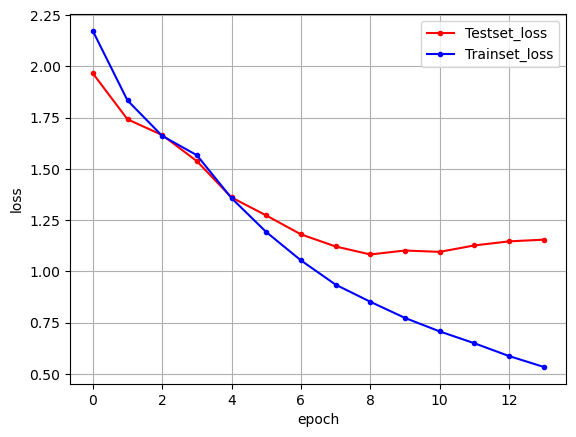

In [5]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.build(input_shape=(None,100))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 64)              │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 55)                  │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25,
                    callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 182ms/step - accuracy: 0.6862 - loss: 0.5413 - val_accuracy: 0.8894 - val_loss: 0.2688
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 168ms/step - accuracy: 0.9139 - loss: 0.2262 - val_accuracy: 0.8906 - val_loss: 0.2632
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.9366 - loss: 0.1726 - val_accuracy: 0.8837 - val_loss: 0.2925
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.9436 - loss: 0.1519 - val_accuracy: 0.8720 - val_loss: 0.3487
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.9596 - loss: 0.1175 - val_accuracy: 0.8909 - val_loss: 0.3182
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8770 - loss: 0.3617

 Test Accuracy: 0.8777


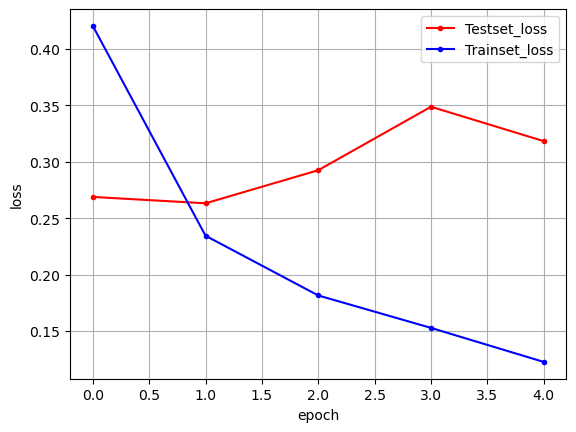

In [9]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 어텐션을 사용한 신경망

In [11]:
!pip install keras-self-attention

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(SeqSelfAttention(attention_activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2030s 3s/step - accuracy: 0.7088 - loss: 0.5036 - val_accuracy: 0.8949 - val_loss: 0.2555
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2022s 3s/step - accuracy: 0.9268 - loss: 0.1919 - val_accuracy: 0.8958 - val_loss: 0.2522
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2026s 3s/step - accuracy: 0.9476 - loss: 0.1440 - val_accuracy: 0.8889 - val_loss: 0.2943
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2021s 3s/step - accuracy: 0.9649 - loss: 0.1010 - val_accuracy: 0.8739 - val_loss: 0.4067
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2055s 3s/step - accuracy: 0.9768 - loss: 0.0651 - val_accuracy: 0.8794 - val_loss: 0.3959
782/782 ━━━━━━━━━━━━━━━━━━━━ 659s 842ms/step - accuracy: 0.8789 - loss: 0.3942

 Test Accuracy: 0.8794


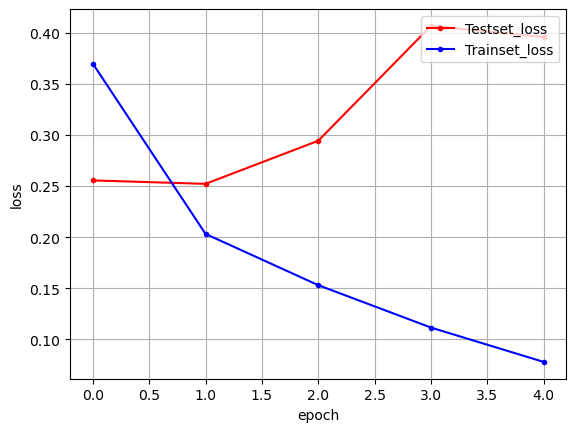

In [13]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()